In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('../data/Crop_recommendationV2.csv')

X = data.drop('label', axis=1)
y = data['label']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [53]:
data

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,10.697757,1,...,4.720355,5,18.597260,87.431199,185.833381,3,31.415618,1,77.719639,4.111619
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,12.203830,3,...,4.141148,6,15.417979,36.958354,198.541021,2,18.797510,3,22.336839,4.190796
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,28.989176,3,...,1.599614,5,12.956675,79.678658,86.724381,2,38.805888,3,41.782729,2.447010
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,13.642305,2,...,8.934077,6,16.868131,31.007156,72.191421,2,8.395498,3,49.619791,4.119388


In [54]:
data.columns

data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9886363636363636
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

(440, 22, 22)


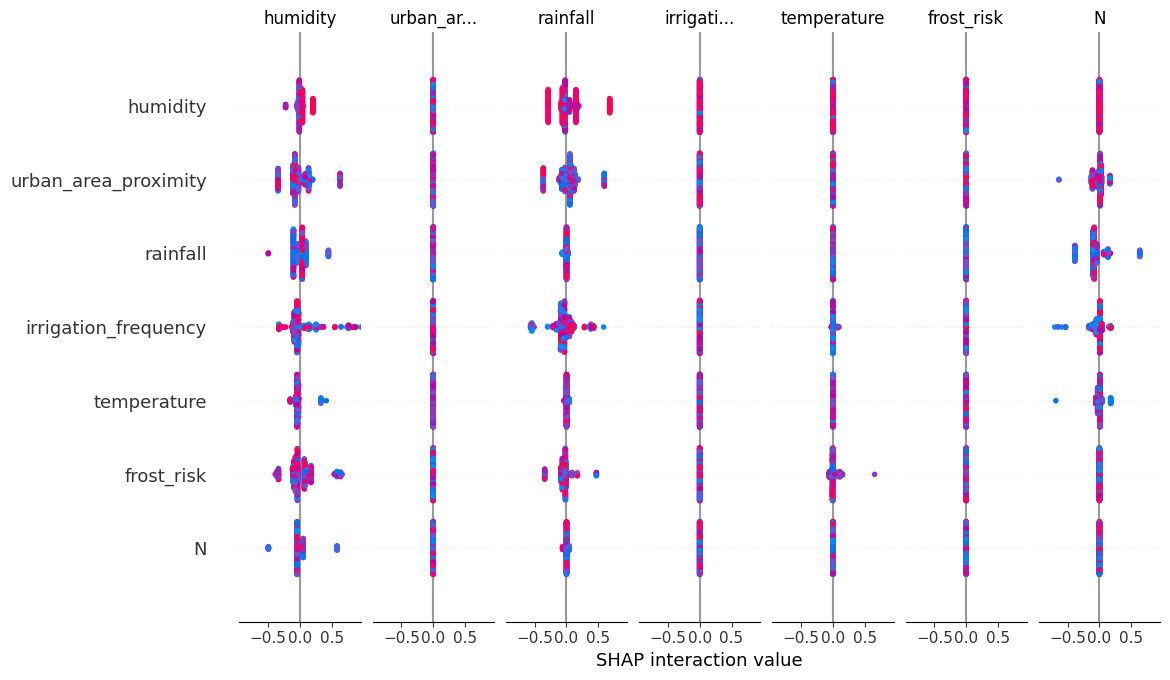

In [26]:
import shap

explainer = shap.TreeExplainer(bagging_model.estimators_[0]) 
shap_values = explainer.shap_values(X_test)

print(shap_values.shape)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

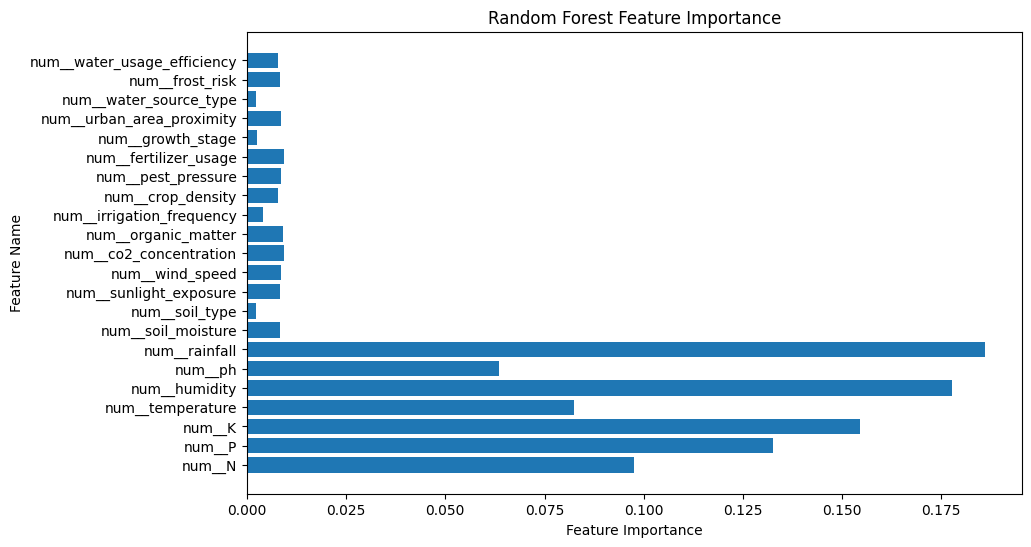

In [27]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importance")
plt.show()

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

base_estimator = DecisionTreeClassifier(random_state=42)

bagging_model = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=50, 
    random_state=42,
    n_jobs=-1  
)

bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9886363636363636
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.91      0.91        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

(440, 22, 22)


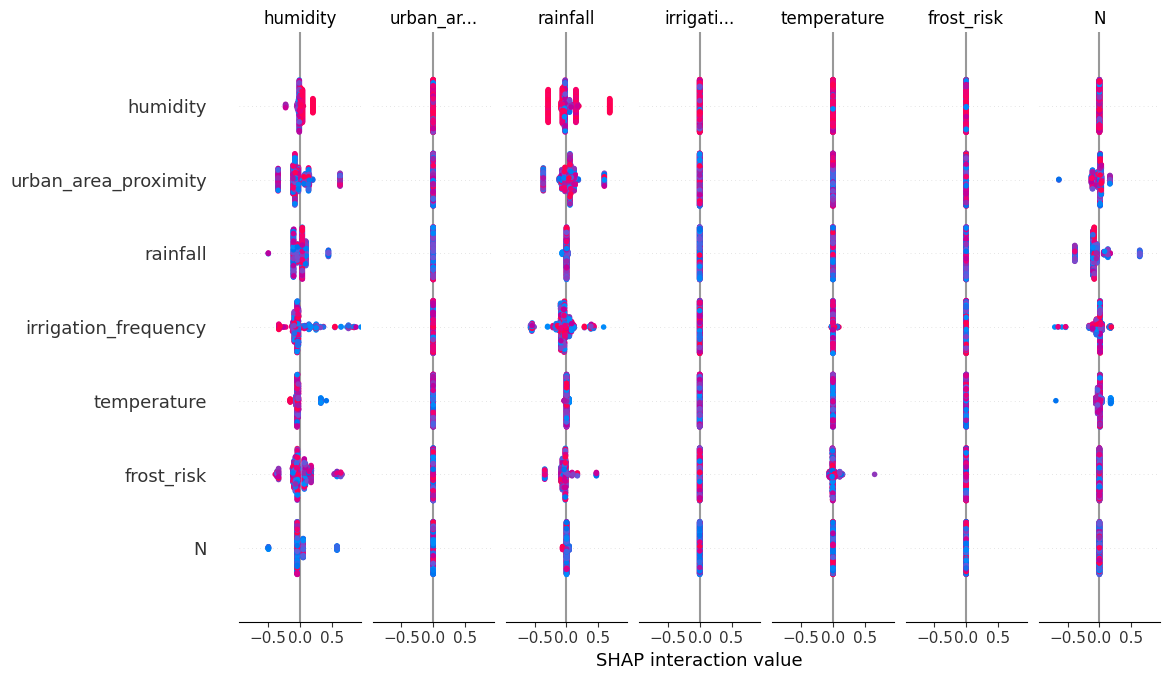

In [31]:
import shap

explainer = shap.TreeExplainer(bagging_model.estimators_[0])  
shap_values = explainer.shap_values(X_test)

print(shap_values.shape)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

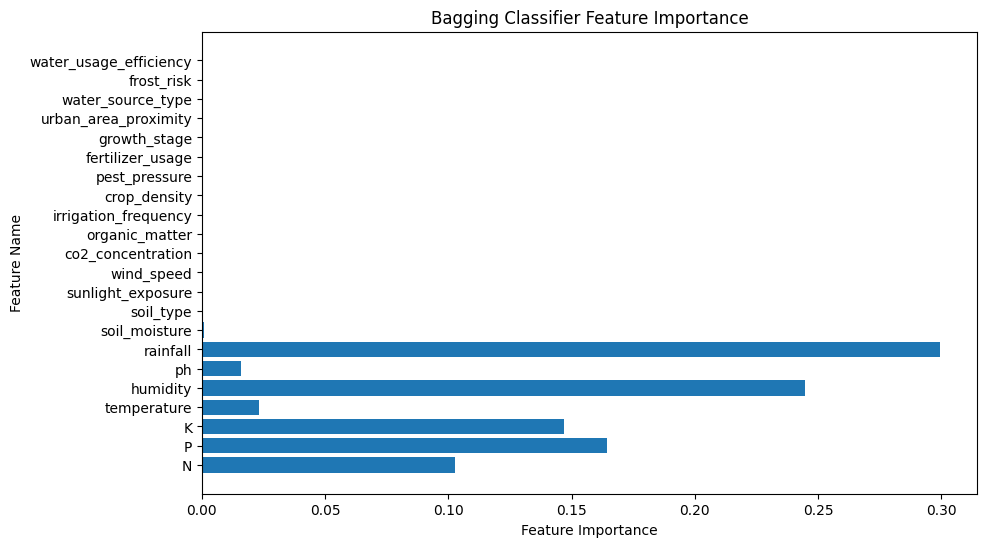

In [32]:
import numpy as np

feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_model.estimators_
], axis=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Bagging Classifier Feature Importance")
plt.show()

In [50]:
# !pip3 install --upgrade pip setuptools wheel
# !pip3 install tensorflow

# !python -c "import struct; print(struct.calcsize('P') * 8)"

# !pip3 install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.0.0-py3-none-any.whl

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(
    n_estimators=100,  
    learning_rate=0.1, 
    max_depth=3,  
    random_state=42,
    n_jobs=-1  
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9863636363636363
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.96      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

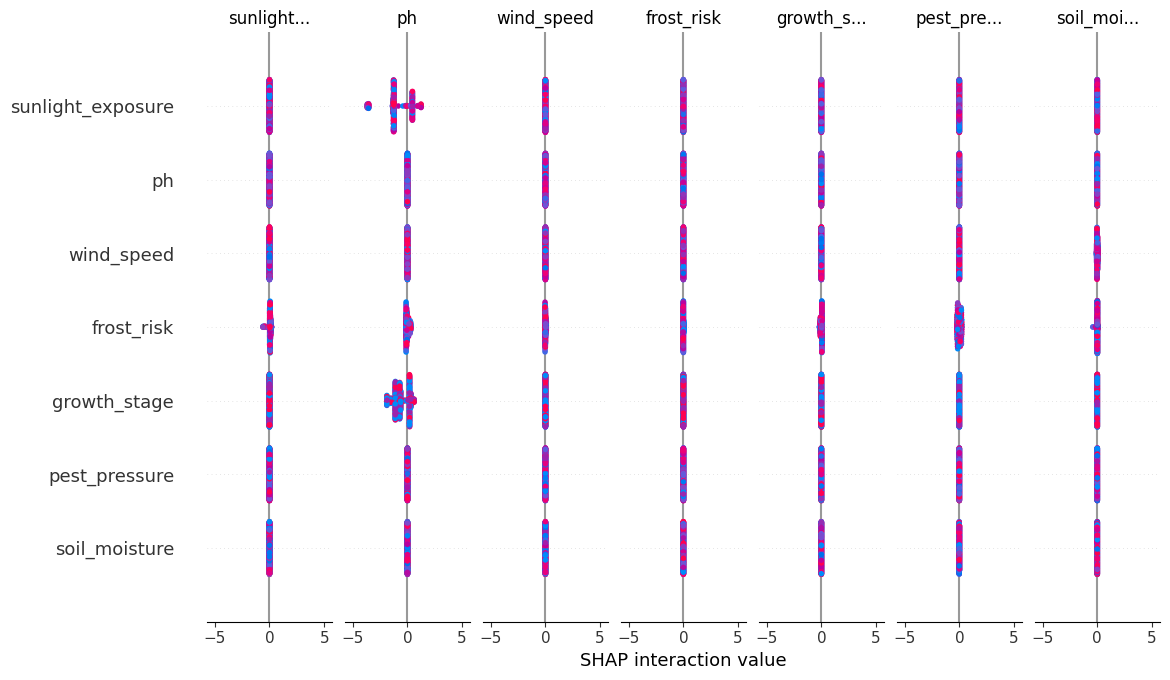

In [57]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

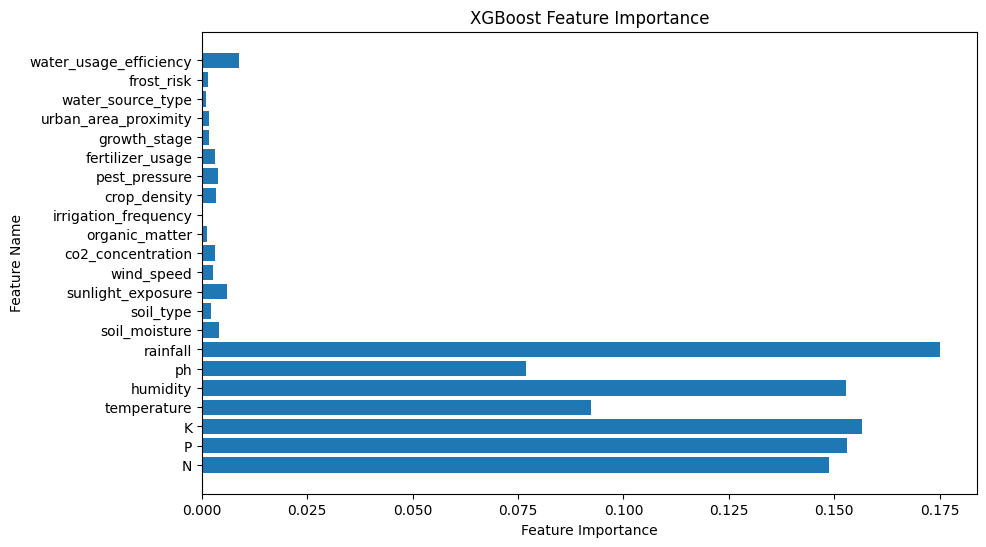

In [58]:
import matplotlib.pyplot as plt

importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.show()